please replace open_api_key  to run it

%pip install selenium

In [1]:
%pip install selenium
%pip install matplotlib
%pip install yfinance 
%pip install pandas
%pip install pandas_datareader
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


Python REPL can execute arbitrary code. Use with caution.
c:\Python39\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


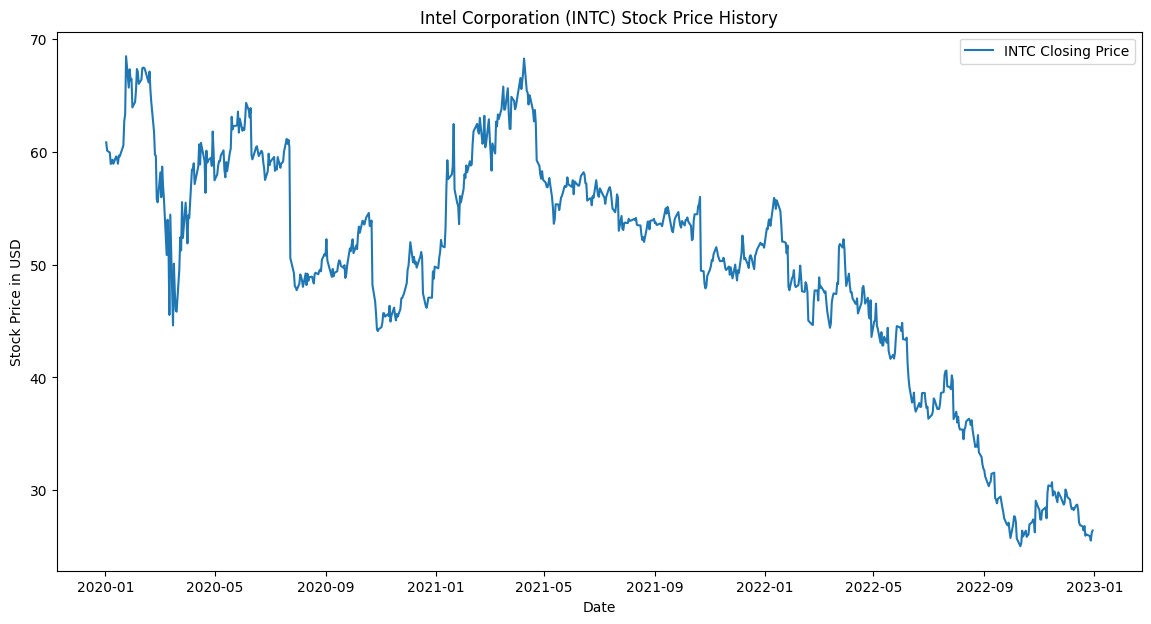

''

In [1]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_experimental.utilities import PythonREPL
from langchain_openai import ChatOpenAI


import os
from dotenv import load_dotenv

load_dotenv(override=True)
#os.environ["OPENAI_API_KEY"] = "your key"


template = """Write standalone python code based on the question from user. 
Write a standalone python code without using function definition.
Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

model = ChatOpenAI(openai_api_key=os.environ["OPENAI_API_KEY"], model_name="gpt-4-0125-preview")

def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

chain = prompt | model | StrOutputParser() | _sanitize_output | PythonREPL().run

#chain.invoke({"input": "whats 2 plus 2"})
#chain.invoke({"input": "graph world population trend over time"})
#chain.invoke({"input": "can you design simple snake game in python"})
chain.invoke({"input": "graph stock price history of INTC over time"})
#chain.invoke({"input": "one plus one"})

